***Importing Libraries:***

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keras Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

# sklearn imports
from sklearn.metrics import classification_report, confusion_matrix

***Data Loading and Preprocessing:***

In [9]:
data_dir = r'E:\Muqadas\university\fyp\FERC\images'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

In [10]:
# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


***EDA: (Visualizing Some Images)***

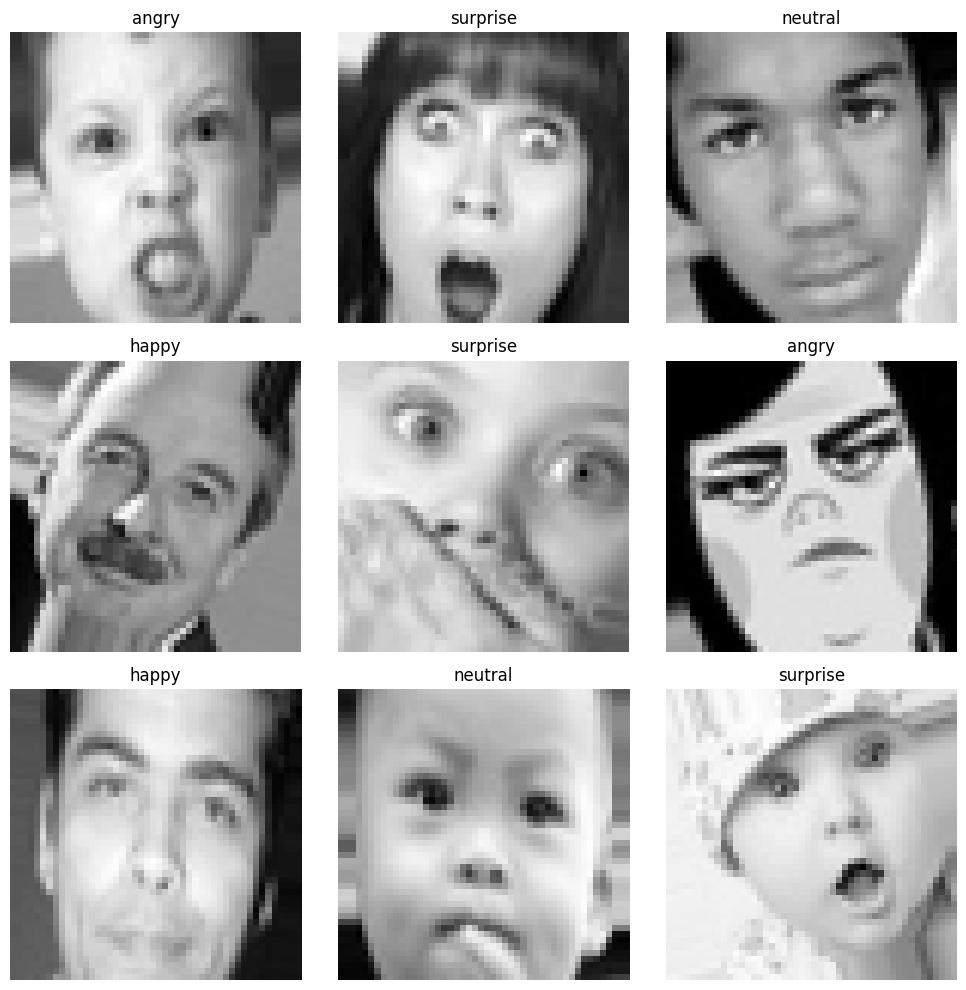

In [11]:
class_names = list(train_generator.class_indices.keys())

images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

***CNN Model Architecture:***

In [12]:
# 3. CNN Model Architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

***Model Training:***

In [13]:
history= model.fit(train_generator, validation_data=validation_generator, epochs=100)

Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 149s 323ms/step - accuracy: 0.2337 - loss: 2.4251 - val_accuracy: 0.2696 - val_loss: 1.9582
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 207s 459ms/step - accuracy: 0.3704 - loss: 1.6643 - val_accuracy: 0.4312 - val_loss: 1.4892
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 182s 404ms/step - accuracy: 0.4456 - loss: 1.4631 - val_accuracy: 0.4672 - val_loss: 1.3745
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 182s 403ms/step - accuracy: 0.4648 - loss: 1.4070 - val_accuracy: 0.5025 - val_loss: 1.3496
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 252s 560ms/step - accuracy: 0.4805 - loss: 1.3588 - val_accuracy: 0.4834 - val_loss: 1.3776
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 249s 529ms/step - accuracy: 0.4840 - loss: 1.3470 - val_accuracy: 0.4314 - val_loss: 1.5458
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 186s 411ms/step - accuracy: 0.5011 - loss: 1.2977 - val_accuracy: 0.4949 - val_loss: 1.3035
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 163s 360ms/step - accuracy: 

***Detection System:***

In [14]:
history = model.history.history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def detect_emotion(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)  # Confidence in %

    # Display the image with the predicted label and confidence
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


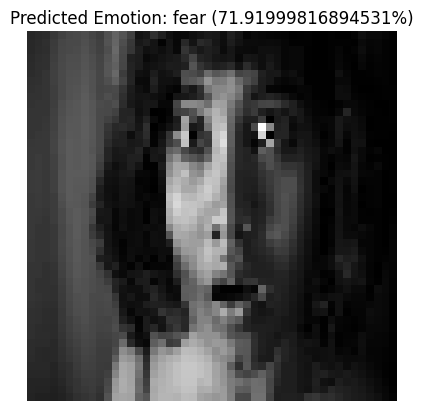

Emotion: fear, Confidence: 71.91999816894531%


In [16]:
# Example Detection
predicted_emotion, confidence = detect_emotion(r'E:\Muqadas\university\fyp\FERC\expressions\fear.jpg')
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


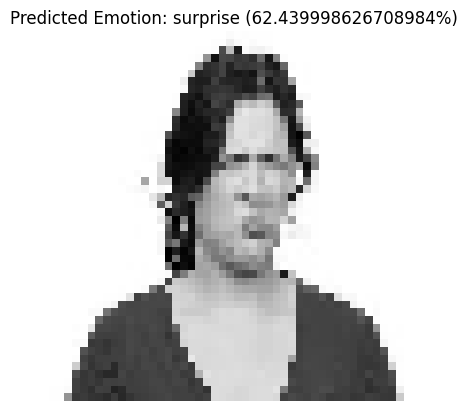

('surprise', np.float32(62.44))


In [17]:
# Example Detection
print(detect_emotion(r'E:\Muqadas\university\fyp\FERC\expressions\disgust2.jpg'))

***Evaluation Matrics:***

***Accuracy & Loss:***

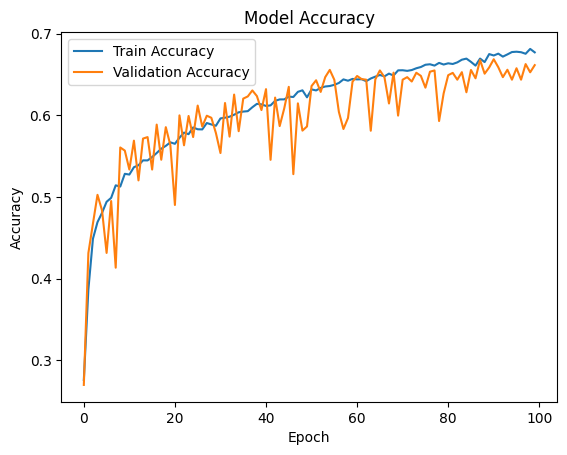

In [18]:
# # Accuracy
# #plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend()
import matplotlib.pyplot as plt

plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


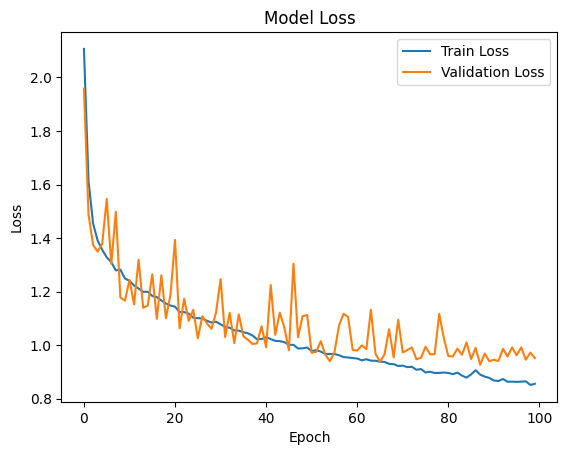

In [19]:
# Loss
#plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [20]:
# Assuming you're using a Keras model and a generator like validation_generator

# Get predictions
y_pred_prob = model.predict(validation_generator)
y_pred = y_pred_prob.argmax(axis=1)  # convert from probabilities to class indices

# Get true labels from the generator
y_true = validation_generator.classes


111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step


***Classification Report:***

In [24]:
print('Classification_Report')
val_images,val_labels = next(validation_generator)
preds = model.predict(val_images)
y_true = np.argmax(val_labels,axis = 1)
y_pred = np.argmax(preds,axis =1)
print(classification_report(y_true,y_pred,target_names = class_name))

Classification_Report
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step 
              precision    recall  f1-score   support

       angry       0.70      0.70      0.70        10
     disgust       0.00      0.00      0.00         1
        fear       1.00      0.45      0.62        11
       happy       0.84      0.94      0.89        17
     neutral       0.50      0.75      0.60         8
         sad       0.80      0.62      0.70        13
    surprise       0.50      1.00      0.67         4

    accuracy                           0.72        64
   macro avg       0.62      0.64      0.60        64
weighted avg       0.76      0.72      0.71        64



c:\Users\muqad\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muqad\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muqad\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***Confusion Matrix:***

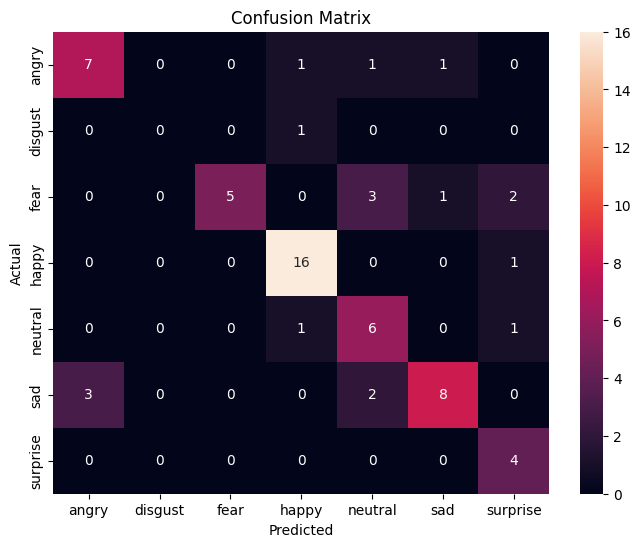

In [25]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***Save the Model***

In [26]:
model.save('micro_expression.h5')

***Live Detection:***

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
model = load_model('micro_expression.h5')  # e.g., micro_expression.h5
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [3]:
cap = cv2.VideoCapture(0)  # 0 for default webcam

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [5]:
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (48, 48))  # Assuming your model takes 48x48 input
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=0)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=-1)

        prediction = model.predict(roi_reshaped)
        emotion_index = np.argmax(prediction)
        emotion = emotion_labels[emotion_index]

        # Draw rectangle and emotion label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Live Emotion Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━

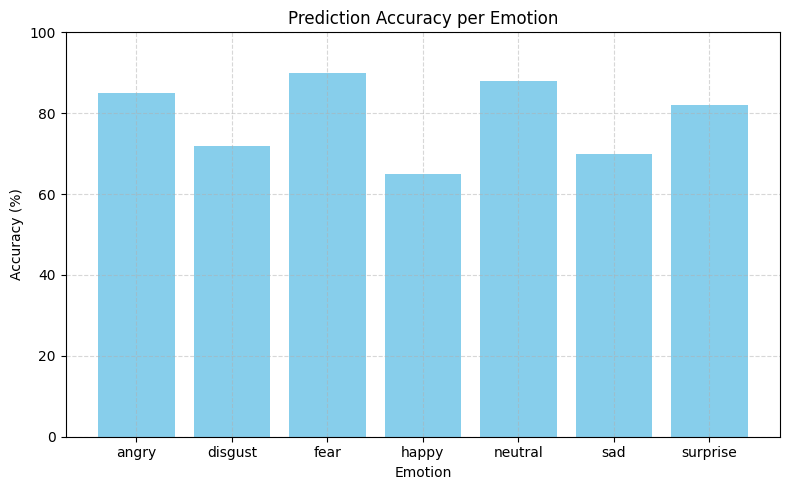

In [ ]:
import matplotlib.pyplot as plt

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
accuracies = [85, 72, 90, 65, 88, 70, 82]  # Example data

plt.figure(figsize=(8,5))
plt.bar(emotions, accuracies, color='skyblue')
plt.title('Prediction Accuracy per Emotion')
plt.xlabel('Emotion')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.legend()
